# Source : from FITS images

We can use a FITS image as the Source object for a ScopeSim Simulation

.. warning: The simulation output is only as good as the input
   
   If the pixel scale of the input (`CDELTn`) is bigger than the pixel scale of the instrument, ScopeSim will simply interpolate the image.
   
   Please don't expect wonders if the input image WCS information is not appropriate for the instrument you are using.
   
ScopeSim Source objects can be generated from fits.ImageHDU object in the following ways:  
  
1. Just an Image and scaling flux value  
2. An Image and the associated synphot Spectrum
3. An Image and arrays for wavelength and flux
  
- ``image_hdu=<fits.ImageHDU>`` + ``flux=<astropy.Quantity>``
- ``image_hdu=<fits.ImageHDU>`` + ``spectra=<list of synphot.SourceSpectrum>``
- ``image_hdu=<fits.ImageHDU>`` + ``lam=<array>`` + ``spectra=<list of arrays>``


In [1]:
import numpy as np
import scipy
import astropy.io.fits as fits
from astropy import units as u
import matplotlib.pyplot as plt
%matplotlib inline

import scopesim

# Make an ImageHDU with some pixel data
hdu = fits.ImageHDU(data=scipy.misc.face(gray=True))

# Give the header some proper WCS info
hdu.header.update({"CDELT1": 1, "CUNIT1": "arcsec", "CRPIX1": 0, "CRVAL1": 0,
                   "CDELT2": 1, "CUNIT2": "arcsec", "CRPIX2": 0, "CRVAL2": 0,})


# plotting function for later
def plot(src):
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    wave = range(3000, 25000)
    plt.plot(wave, image_source.spectra[0](wave))
    plt.xlabel("Wavelength [Angstrom]")
    plt.ylabel("Flux [ph/s/cm2/Angstrom]")
    plt.subplot(122)
    plt.imshow(image_source.fields[0].data)

## 1. Just an Image and scaling flux value 

``image_hdu=<fits.ImageHDU>`` + ``flux=<astropy.Quantity>``

It is assumed that the flux definied here is **integrated** flux and is the total flux contained in the image.

.. note: In future version, header keywords like `BUNIT` etc will also be accepted. This functionality is not yet implemented though (April 2022).

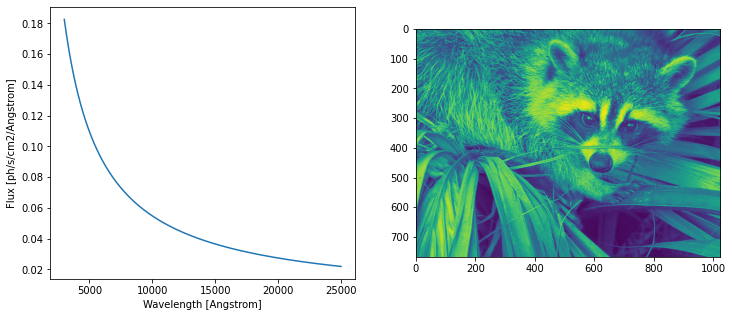

In [2]:
image_source = scopesim.Source(image_hdu=hdu, flux=10*u.ABmag)

plot(image_source)

## 2. An Image and the associated synphot Spectrum

``image_hdu=<fits.ImageHDU>`` + ``spectra=<list of synphot.SourceSpectrum>``

In this case, the image pixel values are seen as multipiers for the spectrum at a given coordinate.

.. note: It is the users responsibility to make sure the total flux of the "cube" (image * spectrum) is scaled appropriately.

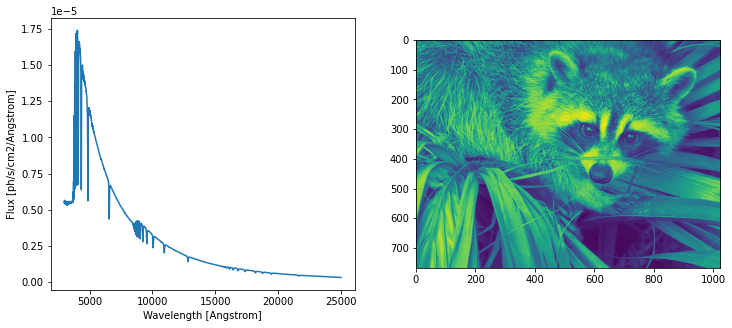

In [3]:
# Alternatively, see the SpeXtra and Pyckles libraries for more spectra
vega_spec = scopesim.source.source_templates.vega_spectrum(mag=20)

image_source = scopesim.Source(image_hdu=hdu, spectra=[vega_spec])

plot(image_source)

## 3. An Image and arrays for wavelength and flux

``image_hdu=<fits.ImageHDU>`` + ``lam=<array>`` + ``spectra=<array of arrays>``

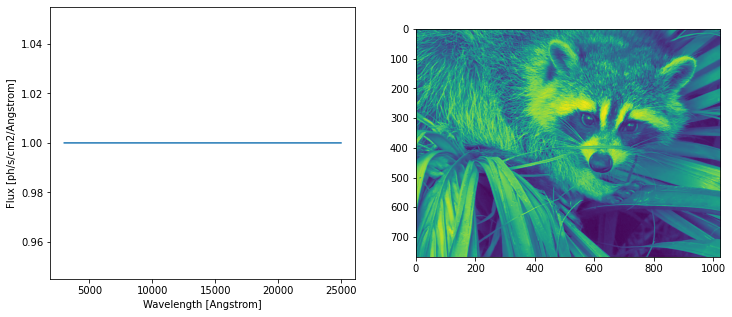

In [4]:
n = 100
wavelengths = np.geomspace(0.3, 2.5, n) * u.um
flux = np.ones(n)

image_source = scopesim.Source(image_hdu=hdu, lam=wavelengths, spectra=np.array([flux]))

plot(image_source)